# **<font color='darkblue'><center>Worldwide Overview of Sexual Assault Cases</center></font>**

### Importation de libraries

In [1]:
library(dplyr)
library(ggplot2)
library(stringr)
library(knitr)
library(TSstudio)


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Lecture de fichier principale

In [2]:

data=read.csv(file = "/kaggle/input/sexual-assault-rape-vioation-india-1970-2020/World Wide Cases detail.csv", header = TRUE)


#  Objectifs d'etude

Quels sont les pays les plus connus pour les violences sexuelles ? <br>
Quelles sont les diverses catégories de violences ? <br>
Quel est le type de violence le plus fréquent ? <br>
Est-il vrai que les femmes souffrent davantage ? <br>
Quel est le continent le plus touché ? <br>
Est-il vrai que les personnes non proches nous affectent davantage ?<br>


### Affichage de premières lignes de données


In [3]:
kable(head(data))



|Iso3_code |Country    |Region   |Subregion        |Indicator        |Dimension          |Category        |Sex   |Age   | Year|Unit.of.measurement | VALUE|Source |
|:---------|:----------|:--------|:----------------|:----------------|:------------------|:---------------|:-----|:-----|----:|:-------------------|-----:|:------|
|AZE       |Azerbaijan |Asia     |Western Asia     |Violent offences |by type of offence |Serious assault |Total |Total | 2003|Counts              |   155|CTS    |
|BEL       |Belgium    |Europe   |Western Europe   |Violent offences |by type of offence |Serious assault |Total |Total | 2003|Counts              | 61959|CTS    |
|BGR       |Bulgaria   |Europe   |Eastern Europe   |Violent offences |by type of offence |Serious assault |Total |Total | 2003|Counts              |  3806|CTS    |
|BHR       |Bahrain    |Asia     |Western Asia     |Violent offences |by type of offence |Serious assault |Total |Total | 2003|Counts              |  2701|CTS    |
|BLR       |Be

### Application de pré-traitement pour assurer la qualité de jeu de données

#### Vérification de valeurs manquantes

In [4]:
missing_values=kable(colSums(is.na(data)))
missing_values



|                    |  x|
|:-------------------|--:|
|Iso3_code           |  0|
|Country             |  0|
|Region              |  0|
|Subregion           |  0|
|Indicator           |  0|
|Dimension           |  0|
|Category            |  0|
|Sex                 |  0|
|Age                 |  0|
|Year                |  0|
|Unit.of.measurement |  0|
|VALUE               |  0|
|Source              |  0|

#### Vérification de valeurs dupliquées

In [5]:
somme=sum(duplicated(data))
cat("le nombre des lignes dupliquées est :",somme)

le nombre des lignes dupliquées est : 0

####  Vérification de types de chaque colonne

In [6]:
kable(sapply(data,typeof))



|                    |x         |
|:-------------------|:---------|
|Iso3_code           |character |
|Country             |character |
|Region              |character |
|Subregion           |character |
|Indicator           |character |
|Dimension           |character |
|Category            |character |
|Sex                 |character |
|Age                 |character |
|Year                |integer   |
|Unit.of.measurement |character |
|VALUE               |double    |
|Source              |character |

# Quel est le pays le plus touché par les violences sexuelles dans les dernières années ?

In [7]:
#vérification de dernière année inclut dans notre dataset
max(data$Year)

[1] 2022

In [8]:
# Ordre décroissant des données
data_ordered = data[order(data$VALUE, decreasing = TRUE),]

# Extraction des données de l'année récente
data_2022 = data_ordered[data_ordered$Year == 2022,]

# Regroupement des données par les pays et calcul de la somme des valeurs
data_grouped <- data_2022 %>%
  group_by(Country) %>%
  summarize(sum_value = sum(VALUE, na.rm = TRUE))  # Assurez-vous de gérer les NA

# Convertir le résultat en data frame
data_grouped <- as.data.frame(data_grouped)

# Trier les données par sum_value en ordre décroissant
data_grouped1<- data_grouped[order(data_grouped$sum_value, decreasing = TRUE),]
# order croissant
data_grouped2<- data_grouped[order(data_grouped$sum_value),]
# Extraire les 10 premiers pays
data1_20 <- data_grouped1[1:20,]


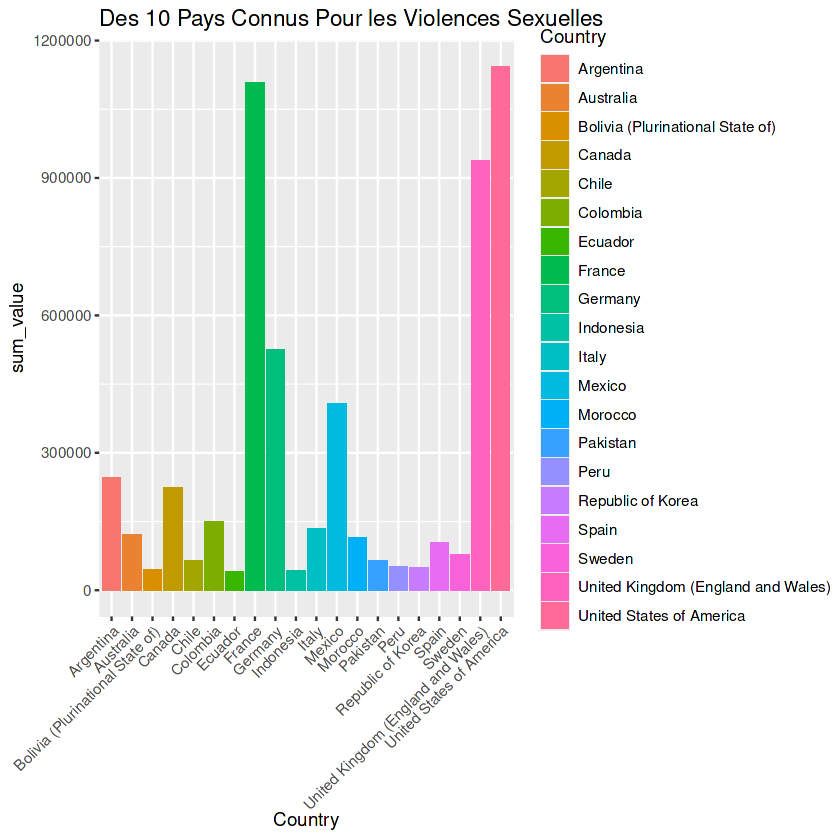

In [9]:
# la visualisation de résultats

ggplot(data1_20, aes(x = Country, y = sum_value, fill = Country)) +
  geom_bar(stat = "identity") +
  ggtitle("Des 10 Pays Connus Pour les Violences Sexuelles") +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

Il apparaît que les États-Unis, la France et le Royaume-Uni sont les 3  pays les plus touchés par les violences sexuelles,sachant que les etats-unis se proche à 1200000 cas juste dans 2022,pas loin la france,et troisièmenet le royaume uni,précisement Angleterre et wales ,dépassant 900000 situation de violences en 2022.En outre,les résultats montrent que le maroc prend un rang avancée (11ème) dans la liste les pays les plus touchés par la violence sexuelle  avec une value converge vers 150000 cas en 2022
.


# Quel est les pays le mois touchés par les violences sexuelles dans les dernières années ?

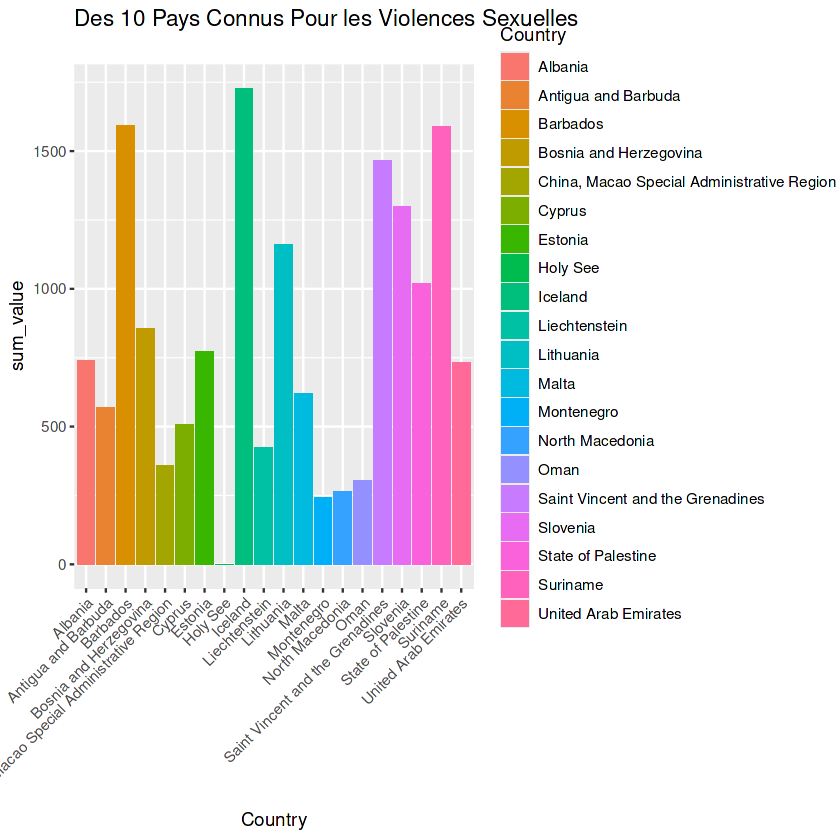

In [10]:
data2_20 <- data_grouped2[1:20,]
# la visualisation de résultats
ggplot(data2_20, aes(x = Country, y = sum_value, fill = Country)) +
  geom_bar(stat = "identity") +
  ggtitle("Des 10 Pays Connus Pour les Violences Sexuelles") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(margin = margin(b = 20)))  # Ajouter de l'espace en bas du titre



Il est évident que le Vatican (Saint-Siège) a le plus faible nombre de cas de violences sexuelles, ne dépassant pas un seul cas, suivi par le Monténégro et la Macédoine du Nord. De plus, bien que la Chine soit connue comme un pays très peuplé, elle se classe parmi les pays ayant un nombre relativement faible de cas de violences sexuelles, ne dépassant pas 500 cas, selon les résultats de la région de Macao.

## La diversité des catégories de violences sexuelles à travers le monde de 2003 à 2022.

In [11]:
min(data$Year)

[1] 2003

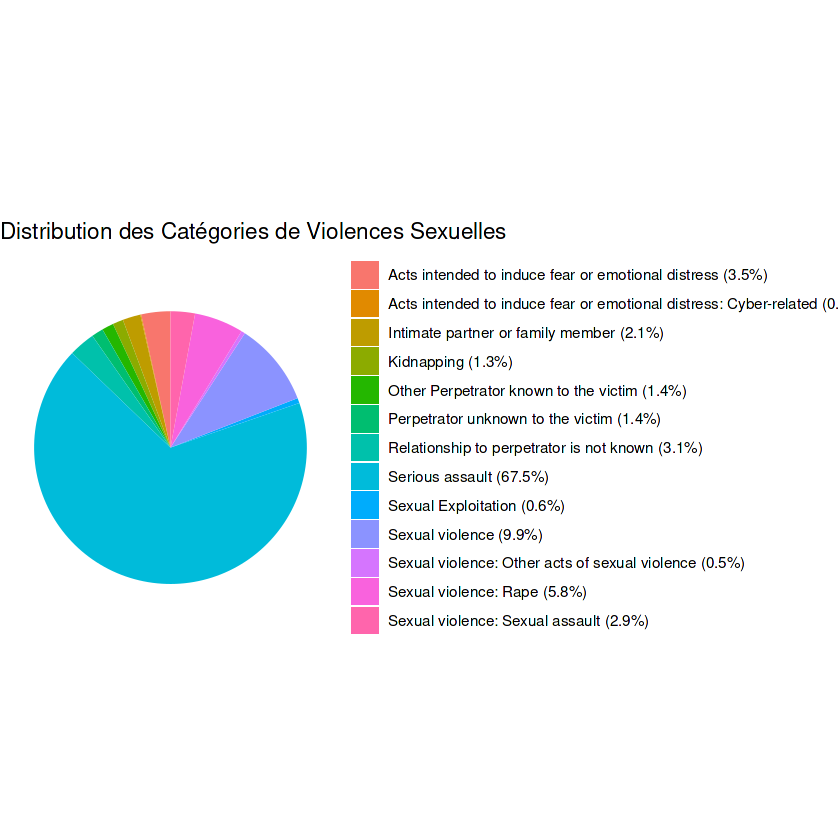

In [12]:
# Grouper les données par catégorie et calculer la somme des valeurs
cate_grouped <- data %>%
  group_by(Category) %>%
  summarize(sum_value1 = sum(VALUE, na.rm = TRUE))

# Calculer les pourcentages pour chaque catégorie
cate_grouped <- cate_grouped %>%
  mutate(Percentage = paste0(Category, " (", round(sum_value1 / sum(sum_value1) * 100, 1), "%)"))

# Créer un diagramme circulaire avec les pourcentages dans la légende
ggplot(cate_grouped, aes(x = "", y = sum_value1, fill = Percentage)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y") +
  theme_void() +  # Enlever le fond et les axes
  theme(legend.title = element_blank(),  # Enlever le titre de la légende
        plot.title = element_text(margin = margin(b = 20))) +  # Ajouter de l'espace en bas du titre
  ggtitle("Distribution des Catégories de Violences Sexuelles")


les issues indiques que les agressions graves (serious assault) qui entraîne des blessures importantes ou une menace grave pour la vie de la victime  prend la plus grande fréquences dans les violences  .

# Est-il vrai que les femmes souffrent davantage ?

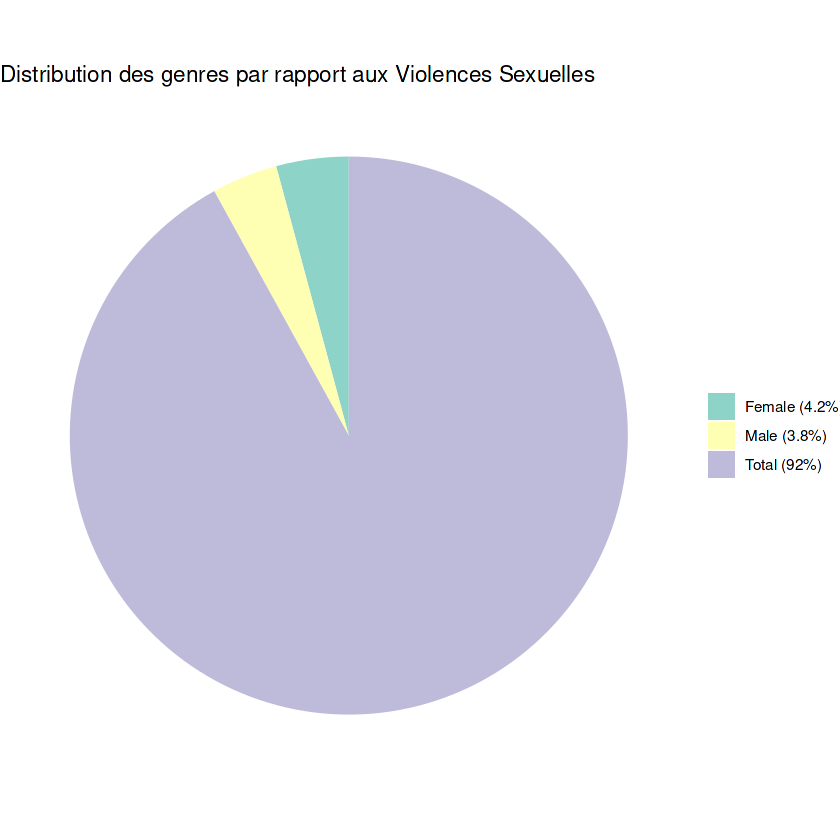

In [13]:
# Grouper les données par Sexe et calculer la somme de VALUE
sexe_grouped <- data %>%
  group_by(Sex) %>%
  summarize(sum_value1 = sum(VALUE, na.rm = TRUE))  # Gestion des NA

# Calculer les pourcentages pour chaque catégorie
sexe_grouped <- sexe_grouped %>%
  mutate(Percentage = paste0(Sex, " (", round(sum_value1 / sum(sum_value1) * 100, 1), "%)"))

# Créer un diagramme circulaire avec les pourcentages dans la légende
ggplot(sexe_grouped, aes(x = "", y = sum_value1, fill = Percentage)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y") +
  theme_void() +  # Enlever le fond et les axes
  theme(legend.title = element_blank()) +  # Enlever le titre de la légende
  ggtitle("Distribution des genres par rapport aux Violences Sexuelles") +  # Titre du graphique
  scale_fill_brewer(palette = "Set3")  # Palette de couleurs pour la légende


# Quel est le continent le plus touché ?

In [14]:
region_grouped=data%>% 
group_by(Region) %>% 
summarize(sum_v=sum(VALUE,na.rm=TRUE))

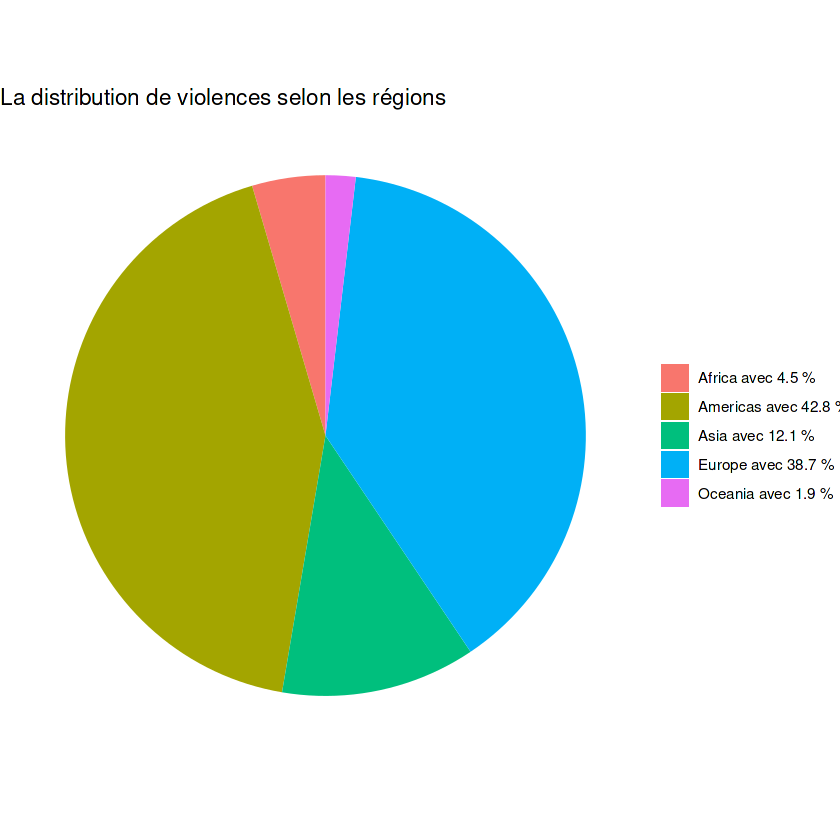

In [15]:
# Calculer les pourcentages pour chaque région
region_grouped <- region_grouped %>%
  mutate(percentage = paste(Region, 'avec', round(sum_v / sum(sum_v) * 100, 1), "%"))

# Créer un diagramme circulaire avec les pourcentages dans la légende
ggplot(region_grouped, aes(x = "", y = sum_v, fill = percentage)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  ggtitle("La distribution de violences selon les régions") +
  theme_void() +  # Enlever le fond et les axes
  theme(legend.title = element_blank())  # Enlever le titre de la légende


# Est-il vrai que les personnes non proches nous affectent davantage ?

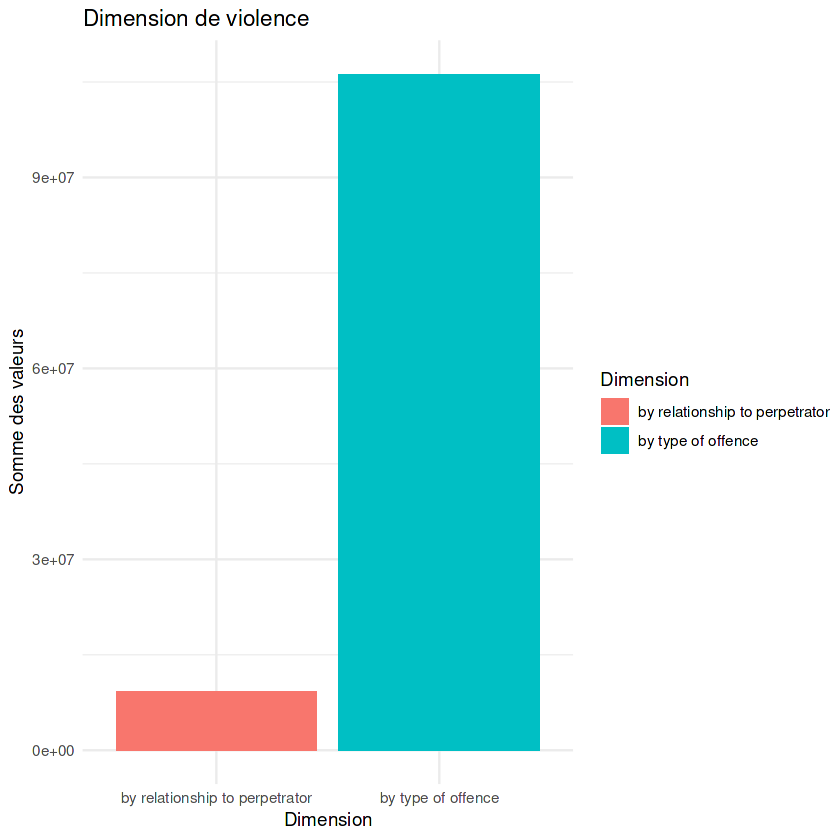

In [16]:
# Grouper les données par Dimension et calculer la somme des valeurs
dimension_group <- data %>%
  group_by(Dimension) %>%
  summarize(sum_2 = sum(VALUE, na.rm = TRUE))



# Créer le graphique à barres
ggplot(dimension_group, aes(x = Dimension, y = sum_2, fill = Dimension)) +
  geom_bar(stat = "identity") +
  ggtitle("Dimension de violence") +
  xlab("Dimension") +
  ylab("Somme des valeurs") +
  theme_minimal() 
  
